In [3]:
import pandas as pd
import os

## Read the file
os.chdir("**********")
df = pd.read_csv('train.csv')

In [2]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#Impute missing values
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

In [6]:
mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [7]:
X = df[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y = df[['Item_Outlet_Sales']]

In [8]:
# Drop the identifier columns from X 
X.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

C:\Users\Nikhil\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
# Preprocessing the Categorical variables
# Using Get dummies
X = pd.get_dummies(data=X, columns=['Item_Fat_Content', 'Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [10]:
##Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


X[['Item_Weight', 'Item_Visibility', 'Item_MRP' ]] = scaler.fit_transform(X[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

In [11]:
#Create train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [12]:
## error rate for different k values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
rmse_val = [] #to store rmse values for different k

In [14]:
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1555.968968924091
RMSE value for k=  2 is: 1339.689142640982
RMSE value for k=  3 is: 1268.4662593761354
RMSE value for k=  4 is: 1245.7949186997546
RMSE value for k=  5 is: 1229.8083997508293
RMSE value for k=  6 is: 1208.7489412588495
RMSE value for k=  7 is: 1206.627193508637
RMSE value for k=  8 is: 1206.3894259963986
RMSE value for k=  9 is: 1207.8068299284505
RMSE value for k=  10 is: 1203.0066905981519
RMSE value for k=  11 is: 1209.6113507953746
RMSE value for k=  12 is: 1211.514810641117
RMSE value for k=  13 is: 1214.6372172931292
RMSE value for k=  14 is: 1221.4235956908258
RMSE value for k=  15 is: 1225.3289200741858
RMSE value for k=  16 is: 1223.4265921731599
RMSE value for k=  17 is: 1227.9399597284332
RMSE value for k=  18 is: 1234.7693909221332
RMSE value for k=  19 is: 1243.3353575875258
RMSE value for k=  20 is: 1251.1828390176775


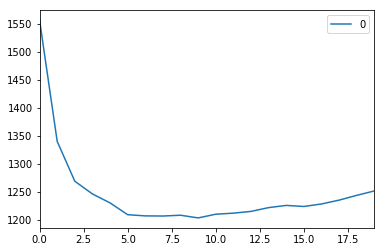

In [15]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [16]:
#Predictions on the test dataset

#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

In [17]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [18]:
#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test['Outlet_Size'].fillna(mode[0], inplace =True)

In [19]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.857645,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
5,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,1997,Small,Tier 1,Supermarket Type1
6,19.350000,Regular,0.082602,Baking Goods,50.1034,2009,Medium,Tier 3,Supermarket Type2
7,12.857645,Low Fat,0.015782,Baking Goods,81.0592,1985,Medium,Tier 3,Supermarket Type3
8,6.305000,Regular,0.123365,Snack Foods,95.7436,2002,Medium,Tier 2,Supermarket Type1
9,5.985000,Low Fat,0.005698,Baking Goods,186.8924,2007,Medium,Tier 2,Supermarket Type1


In [20]:
# Preprocessing the Categorical variables in the Test Data
# Using Get dummies
test = pd.get_dummies(data=test, columns=['Item_Fat_Content', 'Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.857645,0.118599,234.2300,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [21]:
##Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

test[['Item_Weight', 'Item_Visibility', 'Item_MRP' ]] = scaler.fit_transform(test[['Item_Weight', 'Item_Visibility', 'Item_MRP']])

In [24]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,0.023374,0.323413,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.222983,0.118737,0.235849,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0.598095,0.307674,0.894140,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0.164335,0.047548,0.524488,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0.494352,0.366458,0.862069,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [23]:
#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file.csv',index=False)